In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings 
from statsmodels.formula.api import logit
from statsmodels.stats.proportion import proportions_ztest
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/Users/adrianaquinones/Downloads/meta_growth_project_sample.csv")
df.isna().sum()
df['gender'] = df['gender'].astype('category')
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['friend_suggestion_shown'] = df['friend_suggestion_shown'].map({1: 'Yes',0:'No'}).astype('category')
df['retained_day7'] = df['retained_day7'].map({1: 'Retained',0:'No Retained'})
df.head()

,user_id,gender,age,signup_date,friend_suggestion_shown,sessions_7_days,retained_day7,engagement_score,source_channel,time_spent_7_days
0,1,Male,22,2023-01-28,Yes,6,No Retained,54.60,Organic,59.0
1,2,Other,23,2023-01-22,No,0,No Retained,51.82,Ads,72.5
2,3,Female,28,2023-01-11,No,3,Retained,65.10,Organic,60.1
3,4,Female,32,2023-01-01,No,4,No Retained,51.55,Organic,39.1
4,5,Male,37,2023-01-21,Yes,0,Retained,46.14,Referral,93.0


  source_channel  time_spent_7_days
3         Social          63.606283
1        Organic          63.739467
0            Ads          64.633333
2       Referral          66.987500


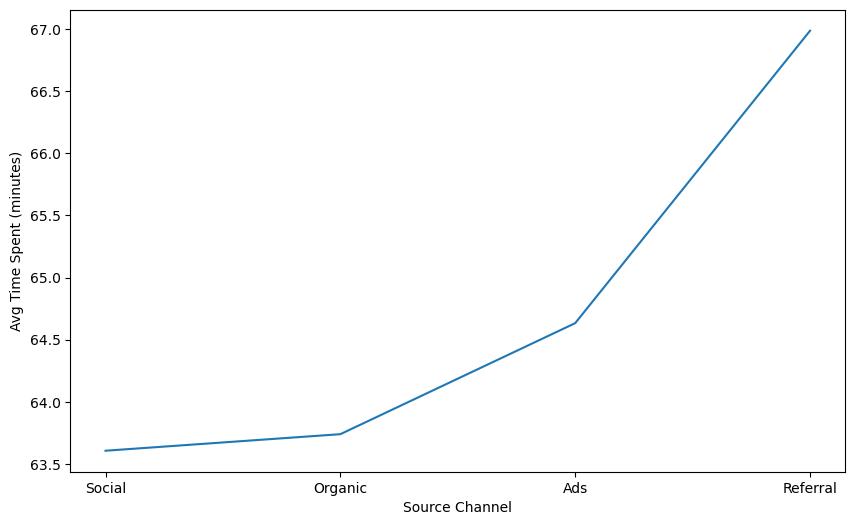

In [5]:
avg_time_by_channel = df.groupby('source_channel')['time_spent_7_days'].mean().reset_index().sort_values('time_spent_7_days')
print(avg_time_by_channel)

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(avg_time_by_channel['source_channel'],avg_time_by_channel['time_spent_7_days'])
ax.set_xlabel('Source Channel')
ax.set_ylabel('Avg Time Spent (minutes)')
plt.show()


In [72]:
retantion_count = df['retained_day7'].value_counts()
retantion_count_per = df['retained_day7'].value_counts(normalize = True) * 100
retantion_count_per

retained_day7
No Retained    68.45
Retained       31.55
Name: proportion, dtype: float64

  age_brackets retained_day7  count
0        18-25   No Retained    434
1        18-25      Retained    181
2        26-34   No Retained    579
3        26-34      Retained    276
4        35-44   No Retained    319
5        35-44      Retained    152
6        45-54   No Retained     34
7        45-54      Retained     22


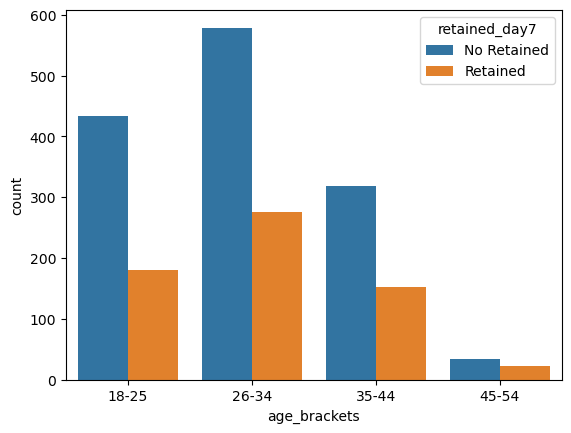

In [73]:
age_bins = [17, 25, 34, 44, 54]
age_labels = ["18-25", "26-34", "35-44", "45-54"]

df['age_brackets'] = pd.cut(df['age'], bins = age_bins, labels= age_labels)

retention_counts_by_age = df.groupby(['age_brackets', 'retained_day7']).size().reset_index(name='count')
print(retention_counts_by_age)

sns.barplot(x = 'age_brackets', y = 'count', data = retention_counts_by_age, hue = 'retained_day7' )
plt.show()


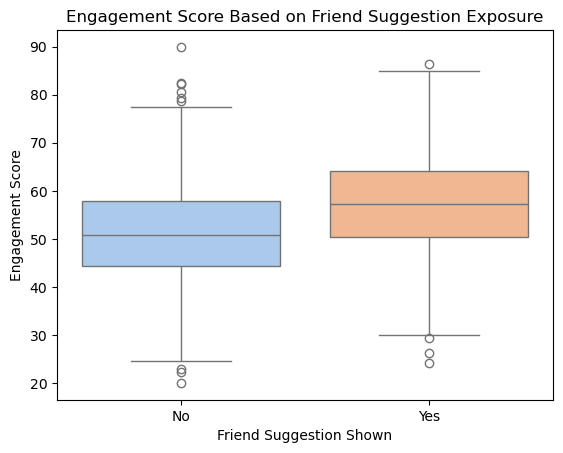

In [74]:
sns.boxplot(data=df, x='friend_suggestion_shown', y='engagement_score', palette='pastel')
plt.title("Engagement Score Based on Friend Suggestion Exposure")
plt.xlabel("Friend Suggestion Shown")
plt.ylabel("Engagement Score")
plt.show()

   gender retained_day7  count
0  Female   No Retained    608
1  Female      Retained    302
2    Male   No Retained    622
3    Male      Retained    271
4   Other   No Retained    139
5   Other      Retained     58


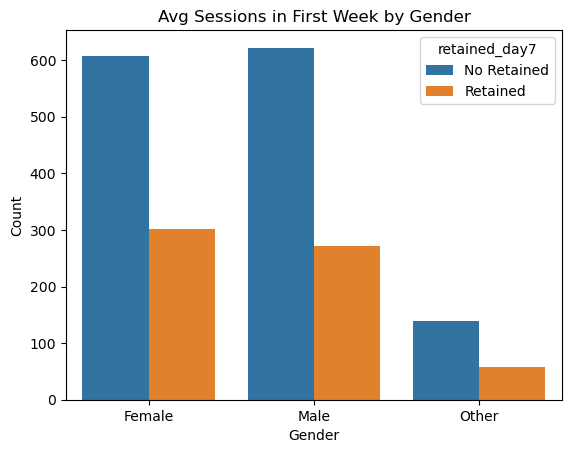

In [75]:
retention_counts_by_gender = df.groupby(['gender', 'retained_day7']).size().reset_index(name='count')
print(retention_counts_by_gender)

sns.barplot(x = 'gender', y = 'count', data = retention_counts_by_gender, hue = 'retained_day7' )
plt.title('Avg Sessions in First Week by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

  friend_suggestion_shown  engagement_score
0                      No         51.029476
1                     Yes         57.283292


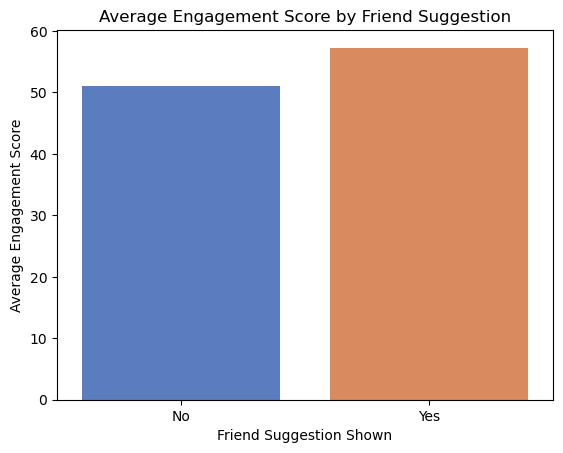

In [76]:
avg_engagement = df.groupby('friend_suggestion_shown')['engagement_score'].mean().reset_index()
print(avg_engagement)

sns.barplot(data=avg_engagement, x='friend_suggestion_shown', y='engagement_score', palette='muted')
plt.title('Average Engagement Score by Friend Suggestion')
plt.xlabel('Friend Suggestion Shown')
plt.ylabel('Average Engagement Score')
plt.show()


In [79]:
retention_counts = df.groupby('friend_suggestion_shown')['retained_day7'].value_counts()
print(retention_counts)

n_retained = np.array([206,425])
n_rows = np.array([206 + 825 ,425 + 544])

z_score, p_value = proportions_ztest(count = n_retained, nobs = n_rows,alternative= 'two-sided')

if p_value < 0.05:
    print("🟢 Statistically significant difference in retention between groups.")
else:
    print("🟡 No significant difference in retention between groups.")



friend_suggestion_shown  retained_day7
No                       No Retained      825
                         Retained         206
Yes                      No Retained      544
                         Retained         425
Name: count, dtype: int64
🟢 Statistically significant difference in retention between groups.
